In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

Movie_name  Adult  \
0                           Doo   True   
1             Avengers: Endgame  False   
2                        Avatar  False   
3                       Titanic  False   
4  Star Wars: The Force Awakens  False   

                                           GenreList     Budget Popularity  \
0                                                NaN    3000000        0.6   
1         ['Adventure', 'Science Fiction', 'Action']  356000000    266.554   
2  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  237000000     91.055   
3                               ['Drama', 'Romance']  200000000     76.323   
4  ['Action', 'Adventure', 'Science Fiction', 'Fa...  245000000     51.502   

  VoteAvg VoteCount                                           Overview  \
0     0.0         0                               Doo takes  Manhattan   
1     8.3     17776  After the devastating events of Avengers: Infi...   
2     7.5     23164  In the 22nd century, a paraplegic Marine is di...   
3     7.9     18970  101-year-old Rose DeWitt Bukater tells the sto...   
4     7.4     15668  Thirty years after defeating the Galactic Empi...   

                                     Tagline       Revenue ReleaseDate  \
0                                        NaN  540000000000         NaN   
1            Part of the journey is the end.    2797800564  2019-04-24   
2                Enter the World of Pandora.    2787965087  2009-12-10   
3  Nothing on Earth could come between them.    2187463944  1997-11-18   
4              Every generation has a story.    2068223624  2015-12-15   

  Runtime OriginalLanguage                                  ProductionCompany  \
0     300               en                                                NaN   
1     181               en                         [['Marvel Studios', 'US']]   
2     162               en  [['Dune Entertainment', 'US'], ['Lightstorm En...   
3     194               en  [['Paramount', 'US'], ['Lightstorm Entertainme...   
4     136               en    [['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]   

  ProductionCountry                        SpokenLanguage  
0               NaN                                ['ba']  
1            ['US']                    ['en', 'ja', 'xh']  
2      ['US', 'GB']                          ['en', 'es']  
3            ['US']  ['en', 'fr', 'de', 'sv', 'it', 'ru']  
4            ['US']                                ['en']

In [3]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))

In [4]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

In [5]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [6]:
Movie_CleanedData.head(10)

Movie_name  Adult  \
0             Avengers: Endgame  False   
1                        Avatar  False   
2                       Titanic  False   
3  Star Wars: The Force Awakens  False   
4        Avengers: Infinity War  False   
5                Jurassic World  False   
6                 The Lion King  False   
7                  The Avengers  False   
8                     Furious 7  False   
9                     Frozen II  False   

                                           GenreList       Budget  Popularity  \
0         ['Adventure', 'Science Fiction', 'Action']  356000000.0     266.554   
1  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  237000000.0      91.055   
2                               ['Drama', 'Romance']  200000000.0      76.323   
3  ['Action', 'Adventure', 'Science Fiction', 'Fa...  245000000.0      51.502   
4         ['Adventure', 'Action', 'Science Fiction']  300000000.0     283.248   
5  ['Action', 'Adventure', 'Science Fiction', 'Th...  150000000.0      68.575   
6               ['Adventure', 'Family', 'Animation']  260000000.0      94.877   
7         ['Science Fiction', 'Action', 'Adventure']  220000000.0     139.977   
8                             ['Action', 'Thriller']  190000000.0      73.657   
9  ['Family', 'Animation', 'Adventure', 'Comedy',...  150000000.0     154.917   

   VoteAvg  VoteCount                                           Overview  \
0      8.3    17776.0  After the devastating events of Avengers: Infi...   
1      7.5    23164.0  In the 22nd century, a paraplegic Marine is di...   
2      7.9    18970.0  101-year-old Rose DeWitt Bukater tells the sto...   
3      7.4    15668.0  Thirty years after defeating the Galactic Empi...   
4      8.3    21470.0  As the Avengers and their allies have continue...   
5      6.6    16686.0  Twenty-two years after the events of Jurassic ...   
6      7.2     7563.0  Simba idolizes his father, King Mufasa, and ta...   
7      7.7    24419.0  When an unexpected enemy emerges and threatens...   
8      7.3     8239.0  Deckard Shaw seeks revenge against Dominic Tor...   
9      7.3     7232.0  Elsa, Anna, Kristoff and Olaf head far into th...   

                                     Tagline       Revenue        Profit  \
0            Part of the journey is the end.  2.797801e+09  2.441801e+09   
1                Enter the World of Pandora.  2.787965e+09  2.550965e+09   
2  Nothing on Earth could come between them.  2.187464e+09  1.987464e+09   
3              Every generation has a story.  2.068224e+09  1.823224e+09   
4      An entire universe. Once and for all.  2.046240e+09  1.746240e+09   
5                          The park is open.  1.671713e+09  1.521713e+09   
6                     The King has Returned.  1.656943e+09  1.396943e+09   
7                    Some assembly required.  1.518816e+09  1.298816e+09   
8                        Vengeance Hits Home  1.515048e+09  1.325048e+09   
9             The past is not what it seems.  1.450027e+09  1.300027e+09   

  ReleaseDate  Runtime OriginalLanguage  \
0  2019-04-24    181.0               en   
1  2009-12-10    162.0               en   
2  1997-11-18    194.0               en   
3  2015-12-15    136.0               en   
4  2018-04-25    149.0               en   
5  2015-06-06    124.0               en   
6  2019-07-12    118.0               en   
7  2012-04-25    143.0               en   
8  2015-04-01    137.0               en   
9  2019-11-20    103.0               en   

                                   ProductionCompany ProductionCountry  \
0                         [['Marvel Studios', 'US']]            ['US']   
1  [['Dune Entertainment', 'US'], ['Lightstorm En...      ['US', 'GB']   
2  [['Paramount', 'US'], ['Lightstorm Entertainme...            ['US']   
3    [['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]            ['US']   
4                         [['Marvel Studios', 'US']]            ['US']   
5  [['Amblin Entertainment', 'US'], ['Legendary P...            ['US']   


In [7]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6707 non-null   object 
 1   Adult              6707 non-null   object 
 2   GenreList          6707 non-null   object 
 3   Budget             6707 non-null   float64
 4   Popularity         6707 non-null   float64
 5   VoteAvg            6707 non-null   float64
 6   VoteCount          6707 non-null   float64
 7   Overview           6691 non-null   object 
 8   Tagline            5563 non-null   object 
 9   Revenue            6707 non-null   float64
 10  Profit             6707 non-null   float64
 11  ReleaseDate        6707 non-null   object 
 12  Runtime            6707 non-null   float64
 13  OriginalLanguage   6707 non-null   object 
 14  ProductionCompany  6707 non-null   object 
 15  ProductionCountry  6707 non-null   object 
 16  SpokenLanguage     6707 

In [8]:
Movie_CleanedData.GenreList.head(1000000)

0              ['Adventure', 'Science Fiction', 'Action']
1       ['Action', 'Adventure', 'Fantasy', 'Science Fi...
2                                    ['Drama', 'Romance']
3       ['Action', 'Adventure', 'Science Fiction', 'Fa...
4              ['Adventure', 'Action', 'Science Fiction']
5       ['Action', 'Adventure', 'Science Fiction', 'Th...
6                    ['Adventure', 'Family', 'Animation']
7              ['Science Fiction', 'Action', 'Adventure']
8                                  ['Action', 'Thriller']
9       ['Family', 'Animation', 'Adventure', 'Comedy',...
10             ['Action', 'Adventure', 'Science Fiction']
11             ['Action', 'Adventure', 'Science Fiction']
12                               ['Fantasy', 'Adventure']
13             ['Science Fiction', 'Action', 'Adventure']
14             ['Action', 'Adventure', 'Science Fiction']
15                   ['Animation', 'Adventure', 'Family']
16                       ['Family', 'Fantasy', 'Romance']
17         ['A

In [9]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

    
#count max number each category, to create number of columns
genrecount,production_company_count,production_country_count,spoken_language_count = 0,0,0,0

for i in range(len(Movie_CleanedData)):
    if len(Movie_CleanedData.loc[i,'GenreList'])>genrecount:
        genrecount = len(Movie_CleanedData.loc[i,'GenreList'])
    if len(Movie_CleanedData.loc[i,'ProductionCompany'])>production_company_count:
        production_company_count = len(Movie_CleanedData.loc[i,'ProductionCompany'])
    if len(Movie_CleanedData.loc[i,'ProductionCountry'])>production_country_count:
        production_country_count = len(Movie_CleanedData.loc[i,'ProductionCountry'])
    if len(Movie_CleanedData.loc[i,'SpokenLanguage'])>spoken_language_count:
        spoken_language_count = len(Movie_CleanedData.loc[i,'SpokenLanguage'])
        
       
print(genrecount)
print(production_company_count)
print(production_country_count)
print(spoken_language_count)
        
#to catch and ignore list out of index, replace with NONE.
def catch(var,i):
    try:
        return var[i]
    except Exception as e:
        return None
def catch2(var,i):
    try:
        return var[i][0]
    except Exception as e:
        return None
    
#replace
for i in range(1,genrecount+1):
    Movie_CleanedData.loc[:, 'Genre'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.GenreList]
    
for i in range(1,production_company_count+1):
    Movie_CleanedData.loc[:, 'ProductionCompany'+str(i)] = [catch2(x, i-1) for x in Movie_CleanedData.ProductionCompany]
    
for i in range(1,production_country_count+1):    
    Movie_CleanedData.loc[:, 'ProductionCountry'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.ProductionCountry]

for i in range(1,spoken_language_count+1):    
    Movie_CleanedData.loc[:, 'SpokenLanguage'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.SpokenLanguage]

8
26
12
11


In [10]:
Movie_CleanedData.describe()

Budget    Popularity      VoteAvg     VoteCount       Revenue  \
count  6.707000e+03   6707.000000  6707.000000   6707.000000  6.707000e+03   
mean   2.950852e+07     20.508295     6.410258   1612.965558  8.652781e+07   
std    4.161330e+07    155.826177     1.009427   2762.836250  1.714662e+08   
min    4.000000e+02      0.600000     0.000000      0.000000  3.343190e+05   
25%    5.000000e+06      8.279000     5.900000    136.000000  6.500000e+06   
50%    1.500000e+07     11.513000     6.500000    577.000000  2.556292e+07   
75%    3.600000e+07     18.182000     7.100000   1756.000000  9.000005e+07   
max    9.653130e+08  12276.164000    10.000000  28790.000000  2.797801e+09   

             Profit      Runtime         Year        Month  
count  6.707000e+03  6707.000000  6707.000000  6707.000000  
mean   5.701928e+07   111.049053  2001.340092     6.886686  
std    1.449594e+08    23.250644    16.356842     3.417379  
min   -9.635208e+08     0.000000  1913.000000     1.000000  
25%   -6.321245e+05    96.000000  1995.000000     4.000000  
50%    9.200000e+06   107.000000  2006.000000     7.000000  
75%    5.510605e+07   122.000000  2013.000000    10.000000  
max    2.550965e+09   339.000000  2021.000000    12.000000

In [12]:
Q1 = np.quantile(Movie_CleanedData.VoteCount, 0.25)
for i in range(len(Movie_CleanedData)):
    if Movie_CleanedData.loc[i,'VoteCount']<Q1:
        Movie_CleanedData.loc[i,'VoteCount'] = np.NaN
        Movie_CleanedData.loc[i,'VoteAvg'] = np.NaN

In [13]:
Movie_CleanedData.head(1000)

Movie_name  Adult  \
0                                    Avengers: Endgame  False   
1                                               Avatar  False   
2                                              Titanic  False   
3                         Star Wars: The Force Awakens  False   
4                               Avengers: Infinity War  False   
5                                       Jurassic World  False   
6                                        The Lion King  False   
7                                         The Avengers  False   
8                                            Furious 7  False   
9                                            Frozen II  False   
10                             Avengers: Age of Ultron  False   
11                                       Black Panther  False   
12        Harry Potter and the Deathly Hallows: Part 2  False   
13                            Star Wars: The Last Jedi  False   
14                      Jurassic World: Fallen Kingdom  False   
15                                              Frozen  False   
16                                Beauty and the Beast  False   
17                                       Incredibles 2  False   
18                             The Fate of the Furious  False   
19                                          Iron Man 3  False   
20                                             Minions  False   
21                          Captain America: Civil War  False   
22                                             Aquaman  False   
23                           Spider-Man: Far from Home  False   
24                                      Captain Marvel  False   
25                      Transformers: Dark of the Moon  False   
26       The Lord of the Rings: The Return of the King  False   
27                                             Skyfall  False   
28                               The Dark Knight Rises  False   
29                                               Joker  False   
30                    Star Wars: The Rise of Skywalker  False   
31                                         Toy Story 4  False   
32                                         Toy Story 3  False   
33          Pirates of the Caribbean: Dead Man's Chest  False   
34                        Rogue One: A Star Wars Story  False   
35                                             Aladdin  False   
36         Pirates of the Caribbean: On Stranger Tides  False   
37                                     Despicable Me 3  False   
38                                        Finding Dory  False   
39                                 Alice in Wonderland  False   
40                                            Zootopia  False   
41                   The Hobbit: An Unexpected Journey  False   
42                                     The Dark Knight  False   
43            Harry Potter and the Philosopher's Stone  False   
44                                     Despicable Me 2  False   
45                                     The Jungle Book  False   
46                      Jumanji: Welcome to the Jungle  False   
47            Pirates of the Caribbean: At World's End  False   
48                 The Hobbit: The Desolation of Smaug  False   
49           The Hobbit: The Battle of the Five Armies  False   
50        Harry Potter and the Deathly Hallows: Part 1  False   
51                                        Finding Nemo  False   
52           Harry Potter and the Order of the Phoenix  False   
53              Harry Potter and the Half-Blood Prince  False   
54                                             Shrek 2  False   
55               The Lord of the Rings: The Two Towers  False   
56           Star Wars: Episode I - The Phantom Menace  False   
57                                       Jurassic Park  False   
58                 Harry Potter and the Goblet of Fire  False   
59                                   Bohemian Rhapsody  False   
60                                        Spider-Man 3  False   
61            

<AxesSubplot:title={'center':'Profit vs VoteCount'}, xlabel='VoteCount', ylabel='Profit'>

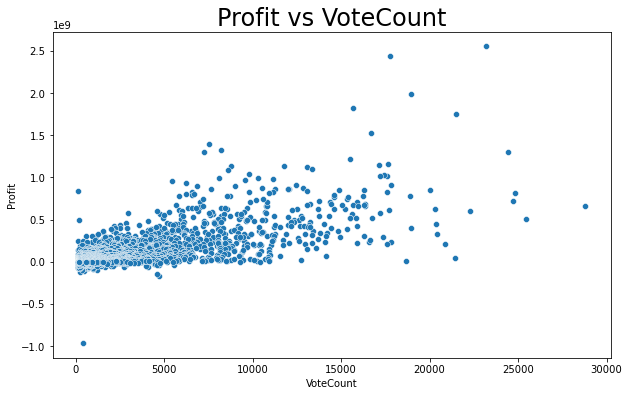

In [65]:
#Plotting VoteCount versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
Movie_CleanedData.VoteCount.dropna()
plt.title("Profit vs VoteCount", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteCount", y="Profit")

<AxesSubplot:title={'center':'Profit vs VoteAvg'}, xlabel='VoteAvg', ylabel='Profit'>

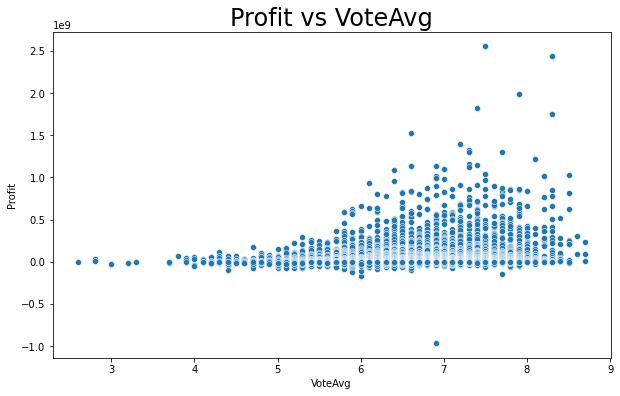

In [66]:
#Plotting VoteAvg versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
Movie_CleanedData.VoteAvg.dropna()
plt.title("Profit vs VoteAvg", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteAvg", y="Profit")

Exploratory Analysis

In [42]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

Budget  Popularity  VoteAvg  VoteCount       Revenue        Profit  \
0  356000000.0     266.554      8.3    17776.0  2.797801e+09  2.441801e+09   
1  237000000.0      91.055      7.5    23164.0  2.787965e+09  2.550965e+09   
2  200000000.0      76.323      7.9    18970.0  2.187464e+09  1.987464e+09   
3  245000000.0      51.502      7.4    15668.0  2.068224e+09  1.823224e+09   
4  300000000.0     283.248      8.3    21470.0  2.046240e+09  1.746240e+09   

   Runtime  Year  Month  
0    181.0  2019      4  
1    162.0  2009     12  
2    194.0  1997     11  
3    136.0  2015     12  
4    149.0  2018      4

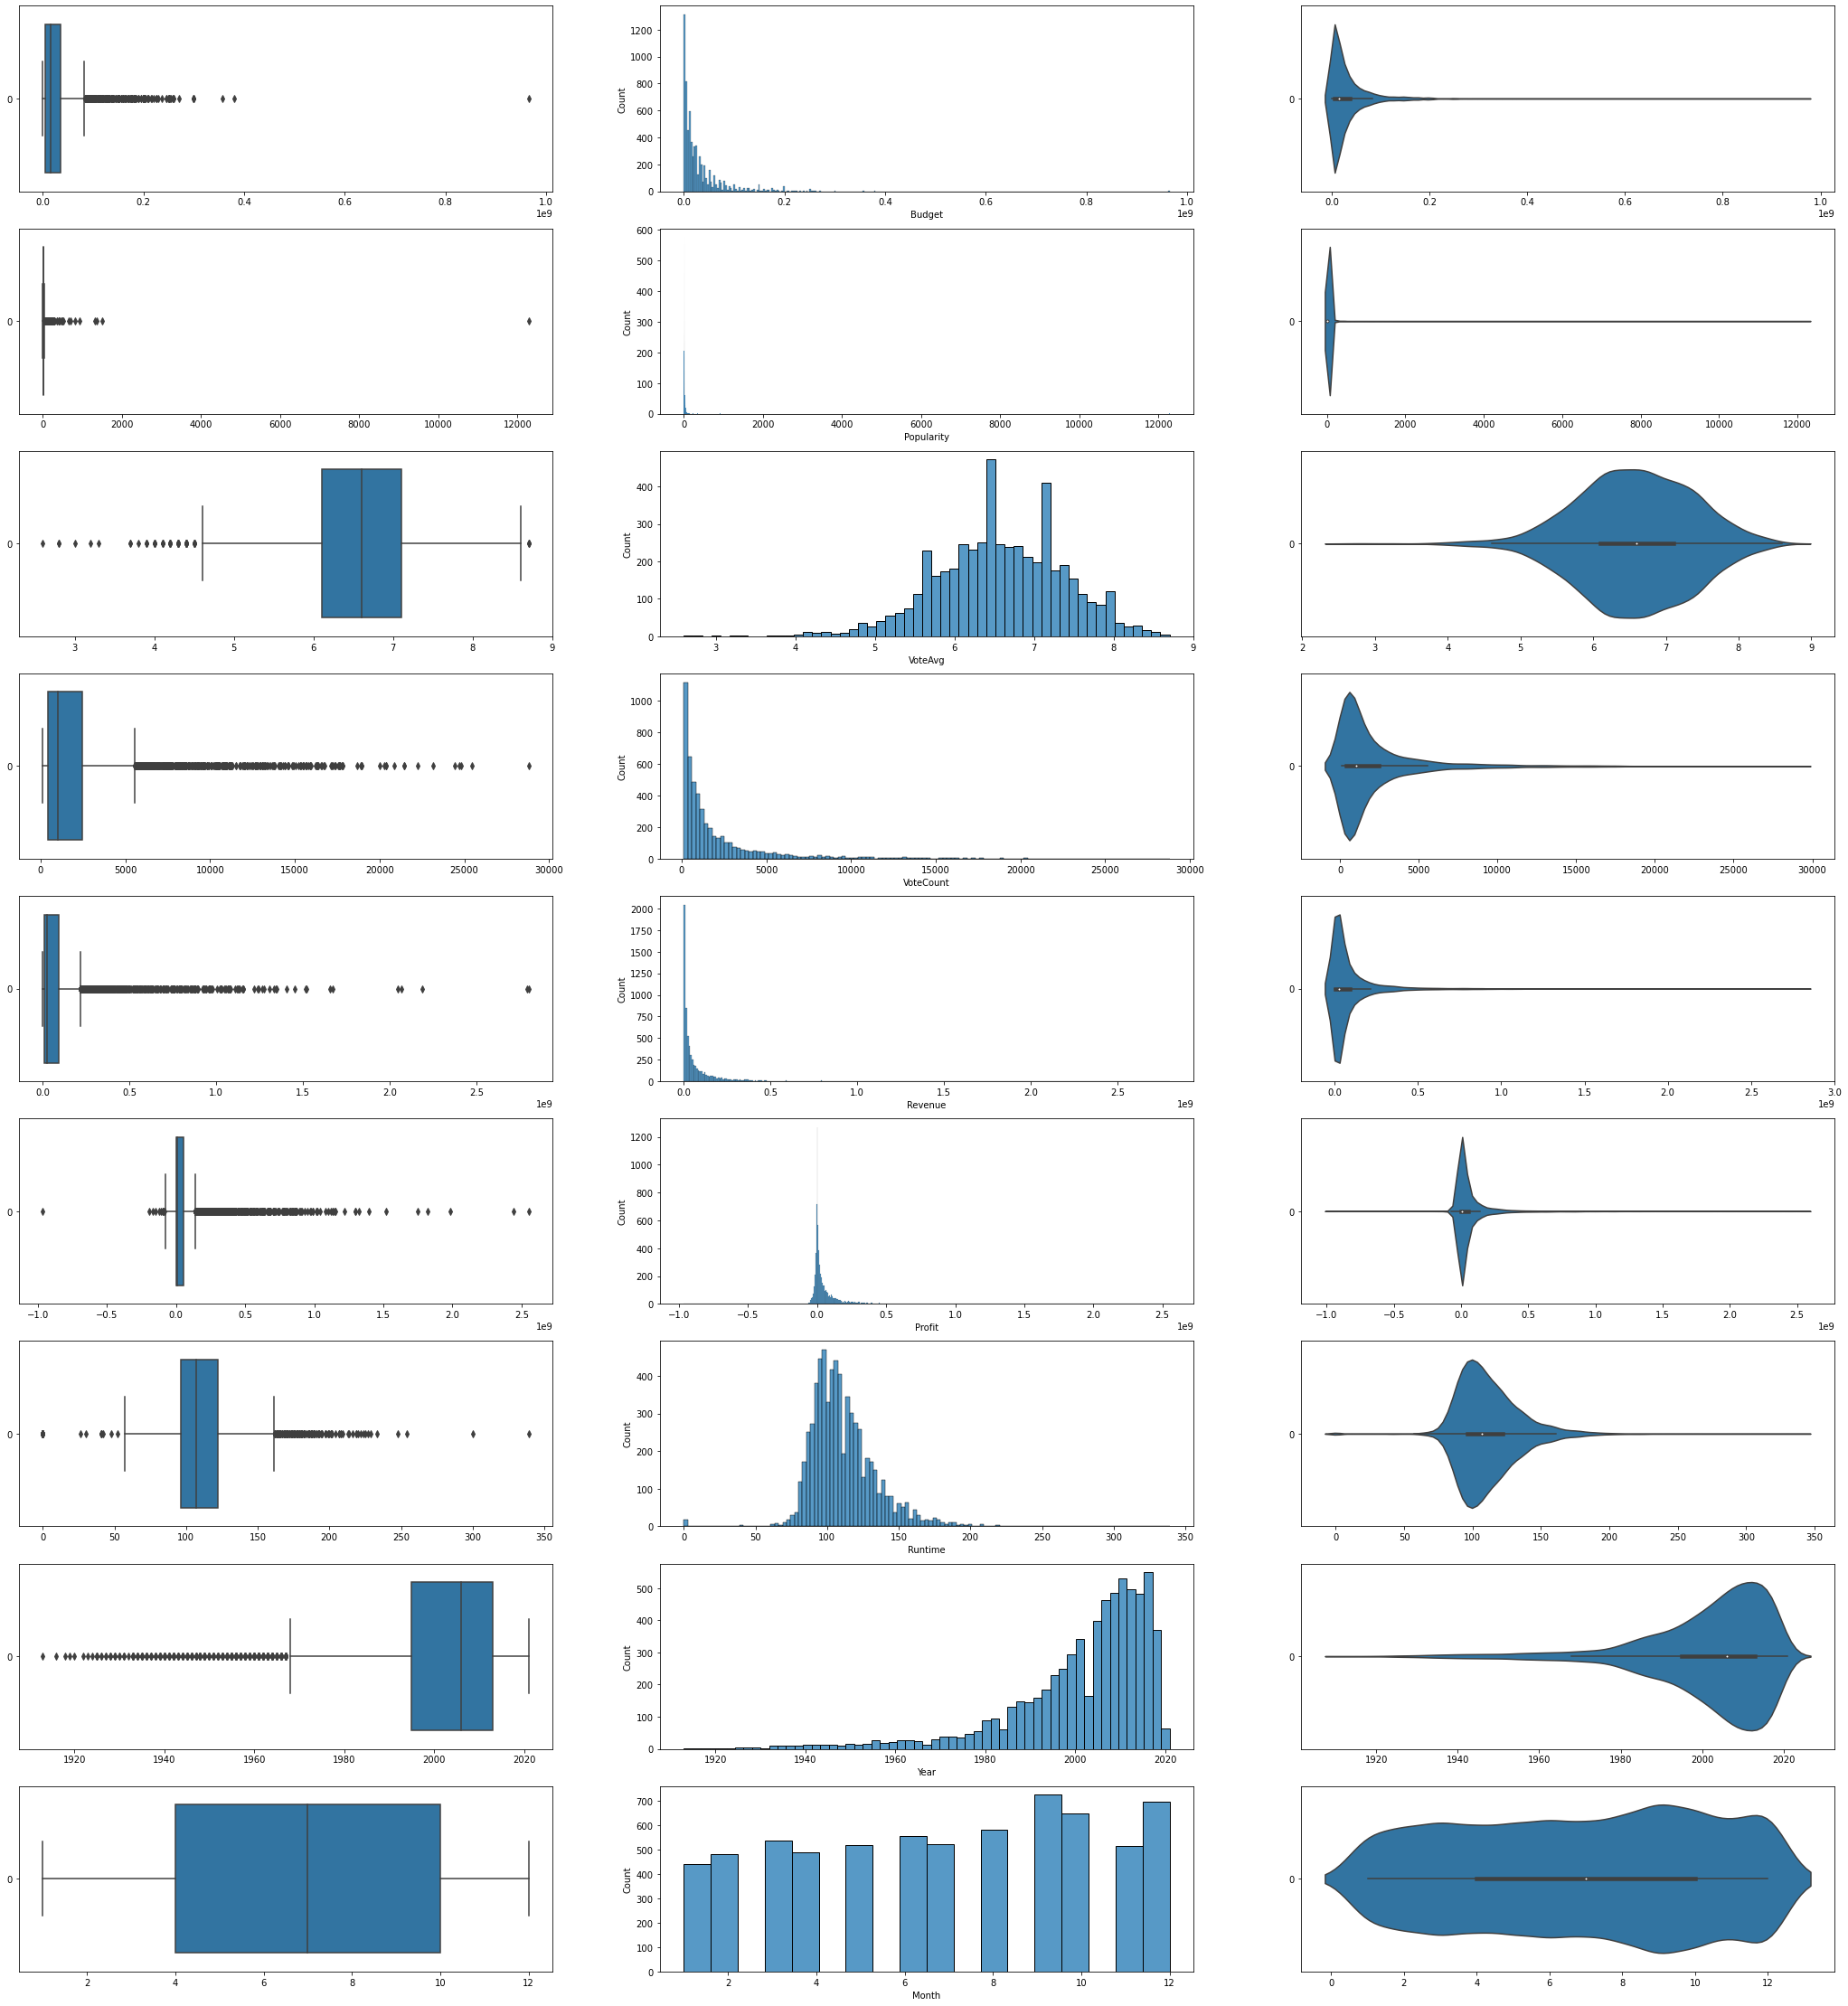

In [43]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.124344 -0.036554   0.524507  0.709089  0.551682   
Popularity  0.124344    1.000000  0.054920   0.078990  0.096016  0.077877   
VoteAvg    -0.036554    0.054920  1.000000   0.365726  0.169519  0.208649   
VoteCount   0.524507    0.078990  0.365726   1.000000  0.747742  0.730471   
Revenue     0.709089    0.096016  0.169519   0.747742  1.000000  0.979299   
Profit      0.551682    0.077877  0.208649   0.730471  0.979299  1.000000   
Runtime     0.135479    0.008930  0.387477   0.239022  0.154639  0.144024   
Year        0.219336    0.053306 -0.208030   0.165924  0.151583  0.116336   
Month       0.031201   -0.011697  0.119913   0.026179  0.032208  0.029141   

             Runtime      Year     Month  
Budget      0.135479  0.219336  0.031201  
Popularity  0.008930  0.053306 -0.011697  
VoteAvg     0.387477 -0.208030  0.119913  
VoteCount   0.239022  0.165924  0.026179  
Revenue     0.

<AxesSubplot:>

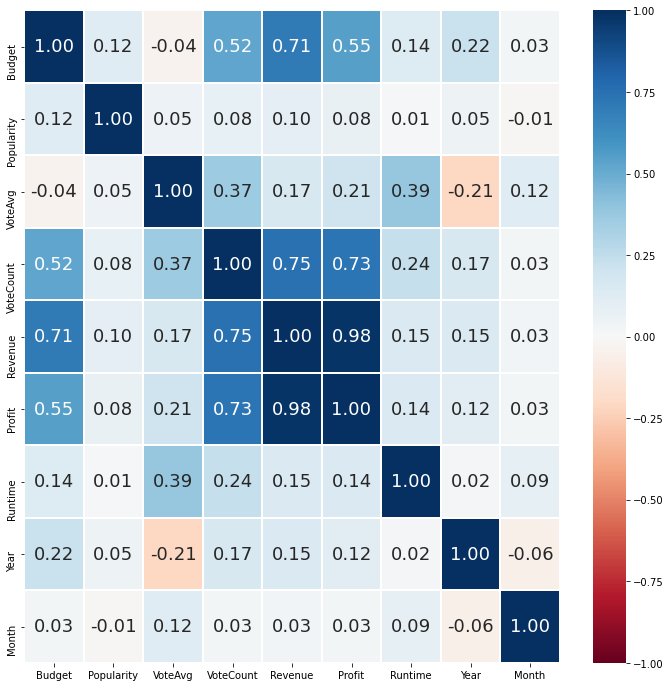

In [44]:
# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

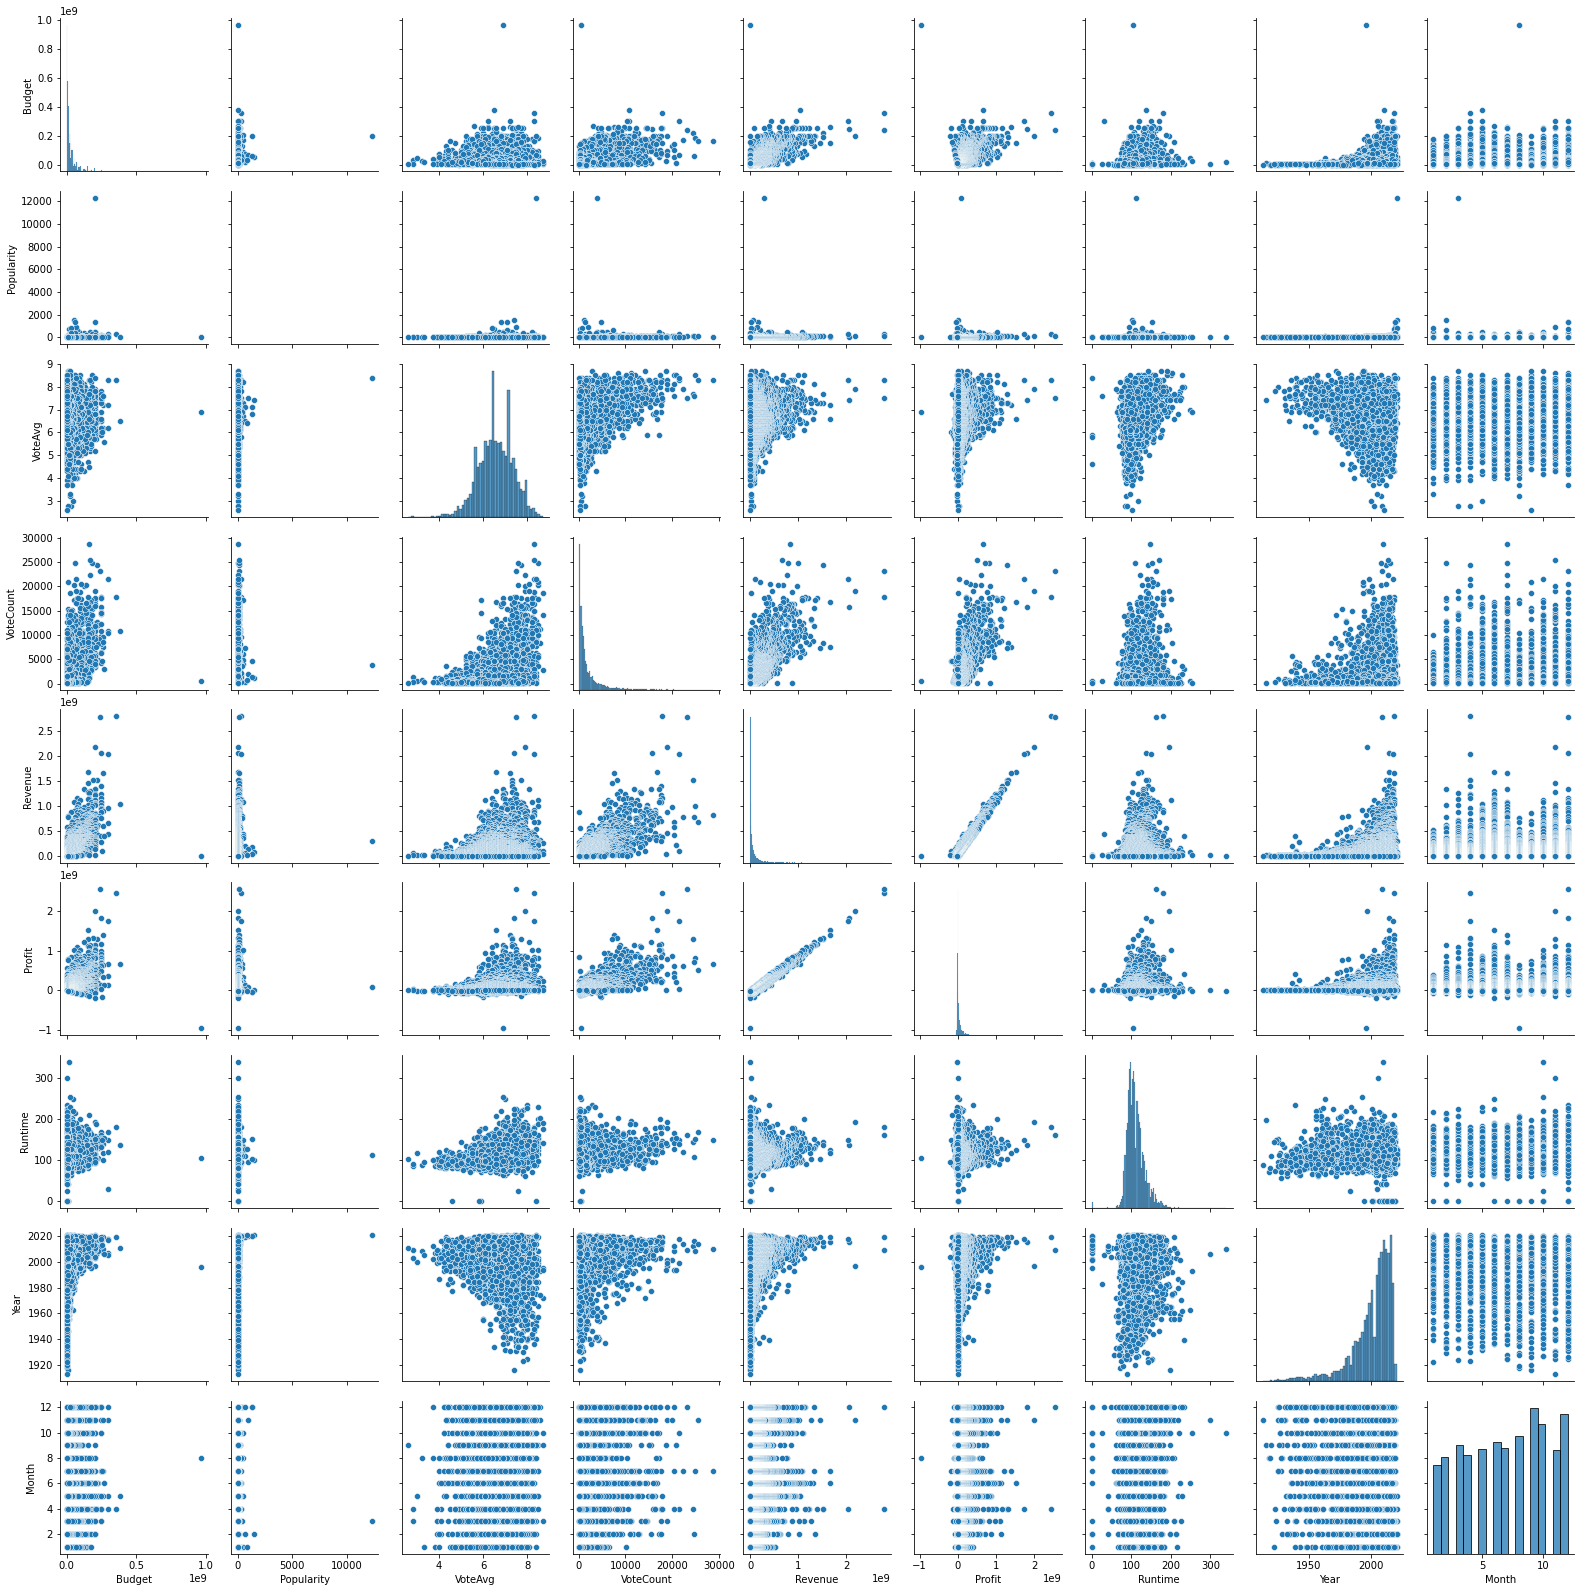

In [45]:
sb.pairplot(data = NumericData)

In [67]:
GenreDic = {}
ProComDic ={}
ProCounDic = {}
SpoLangDic = {}
for i in range(len(Movie_CleanedData)): #every row in df
    for j in range(len(Movie_CleanedData.GenreList[i])): #every element in genrelist
        if Movie_CleanedData.GenreList[i][j] not in GenreDic: #if genre is not in dictionary, initialize genre: 1
            GenreDic[str(Movie_CleanedData.GenreList[i][j])] = 1
        elif Movie_CleanedData.GenreList[i][j] in GenreDic:
            GenreDic[str(Movie_CleanedData.GenreList[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j][0] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j][0])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j][0] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j][0])] +=1
    
    for j in range(len(Movie_CleanedData.ProductionCountry[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCountry[i][j] not in ProCounDic: #if genre is not in dictionary, initialize genre: 1
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] = 1
        elif Movie_CleanedData.ProductionCountry[i][j] in ProCounDic:
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])): #every element in genrelist
        if Movie_CleanedData.SpokenLanguage[i][j] not in SpoLangDic: #if genre is not in dictionary, initialize genre: 1
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] = 1
        elif Movie_CleanedData.SpokenLanguage[i][j] in SpoLangDic:
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] +=1
            


# print(GenreDic)
# print()
# print(ProComDic)
# print()
# print(ProCounDic)
# print()
# print(SpoLangDic)


In [47]:
GenreData = pd.DataFrame(GenreDic, index = ["one"])
GenreData = GenreData.T
GenreData.reset_index(level=0, inplace=True)
GenreData = GenreData.rename(columns={"index": "Genre", "one": "Count"})
GenreData.head()

Genre  Count
0        Adventure   1191
1  Science Fiction    763
2           Action   1741
3          Fantasy    667
4            Drama   3175

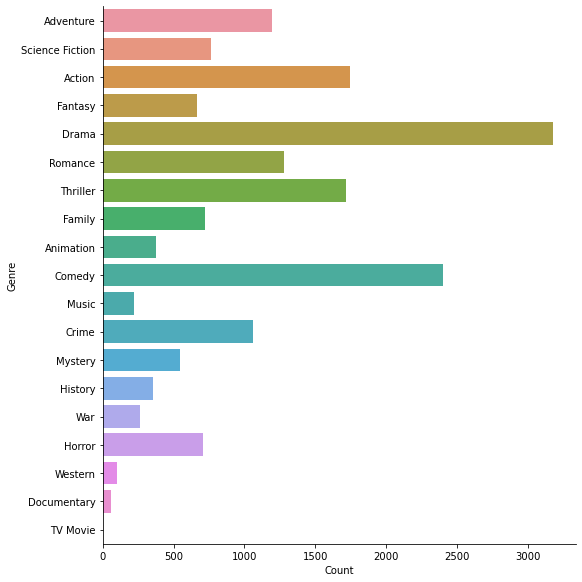

In [20]:
sb.catplot(x = 'Count', y = 'Genre', data = GenreData,kind = 'bar', height = 8)

In [68]:
ProComData = pd.DataFrame(ProComDic, index = ["one"])
ProComData = ProComData.T
ProComData.reset_index(level=0, inplace=True)
ProComData = ProComData.rename(columns={"index": "ProCom", "one": "Count"})
ProComData.drop(ProComData[ProComData.Count < 20].index, inplace=True)
ProComData.info()
ProComList = [x for x in ProComData.ProCom]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 2583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ProCom  124 non-null    object
 1   Count   124 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [69]:
ProComDup = Movie_CleanedData.iloc[0:1].copy()
ProComDup.head()

Movie_name  Adult                             GenreList  \
0  Avengers: Endgame  False  [Adventure, Science Fiction, Action]   

        Budget  Popularity  VoteAvg  VoteCount  \
0  356000000.0     266.554      8.3    17776.0   

                                            Overview  \
0  After the devastating events of Avengers: Infi...   

                           Tagline       Revenue        Profit ReleaseDate  \
0  Part of the journey is the end.  2.797801e+09  2.441801e+09  2019-04-24   

   Runtime OriginalLanguage       ProductionCompany ProductionCountry  \
0    181.0               en  [[Marvel Studios, US]]              [US]   

  SpokenLanguage  Year  Month     Genre1           Genre2  Genre3 Genre4  \
0   [en, ja, xh]  2019      4  Adventure  Science Fiction  Action   None   

  Genre5 Genre6 Genre7 Genre8 ProductionCompany1 ProductionCompany2  \
0   None   None   None   None     Marvel Studios               None   

  ProductionCompany3 ProductionCompany4 ProductionCompany5 ProductionCompany6  \
0               None               None               None               None   

  ProductionCompany7 ProductionCompany8 ProductionCompany9  \
0               None               None               None   

  ProductionCompany10 ProductionCompany11 ProductionCompany12  \
0                None                None                None   

  ProductionCompany13 ProductionCompany14 ProductionCompany15  \
0                None                None                None   

  ProductionCompany16 ProductionCompany17 ProductionCompany18  \
0                None                None                None   

  ProductionCompany19 ProductionCompany20 ProductionCompany21  \
0                None                None                None   

  ProductionCompany22 ProductionCompany23 ProductionCompany24  \
0                None                None                None   

  ProductionCompany25 ProductionCompany26 ProductionCountry1  \
0                None                None                 US   

  ProductionCountry2 ProductionCountry3 ProductionCountry4 ProductionCountry5  \
0               None               None               None               None   

  ProductionCountry6 ProductionCountry7 ProductionCountry8 ProductionCountry9  \
0               None               None               None               None   

  ProductionCountry10 ProductionCountry11 ProductionCountry12 SpokenLanguage1  \
0                None                None                None              en   

  SpokenLanguage2 SpokenLanguage3 SpokenLanguage4 SpokenLanguage5  \
0              ja              xh            None            None   

  SpokenLanguage6 SpokenLanguage7 SpokenLanguage8 SpokenLanguage9  \
0            None            None            None            None   

  SpokenLanguage10 SpokenLanguage11  
0             None             None

In [70]:
for i in range(len(Movie_CleanedData)): 
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): 
        temp = Movie_CleanedData.ProductionCompany[i][j][0]
        if temp in ProComList:
            replace = Movie_CleanedData.iloc[i:i+1].copy() #create copy of row
            replace.ProductionCompany = temp
            ProComDup = ProComDup.append(replace, ignore_index=True)
        if temp not in ProComList:
            replace = Movie_CleanedData.iloc[i:i+1].copy() #create copy of row
            replace.ProductionCompany = "Others"
            ProComDup = ProComDup.append(replace, ignore_index=True)

In [71]:
ProComDup.drop([0])
ProComDup.head()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

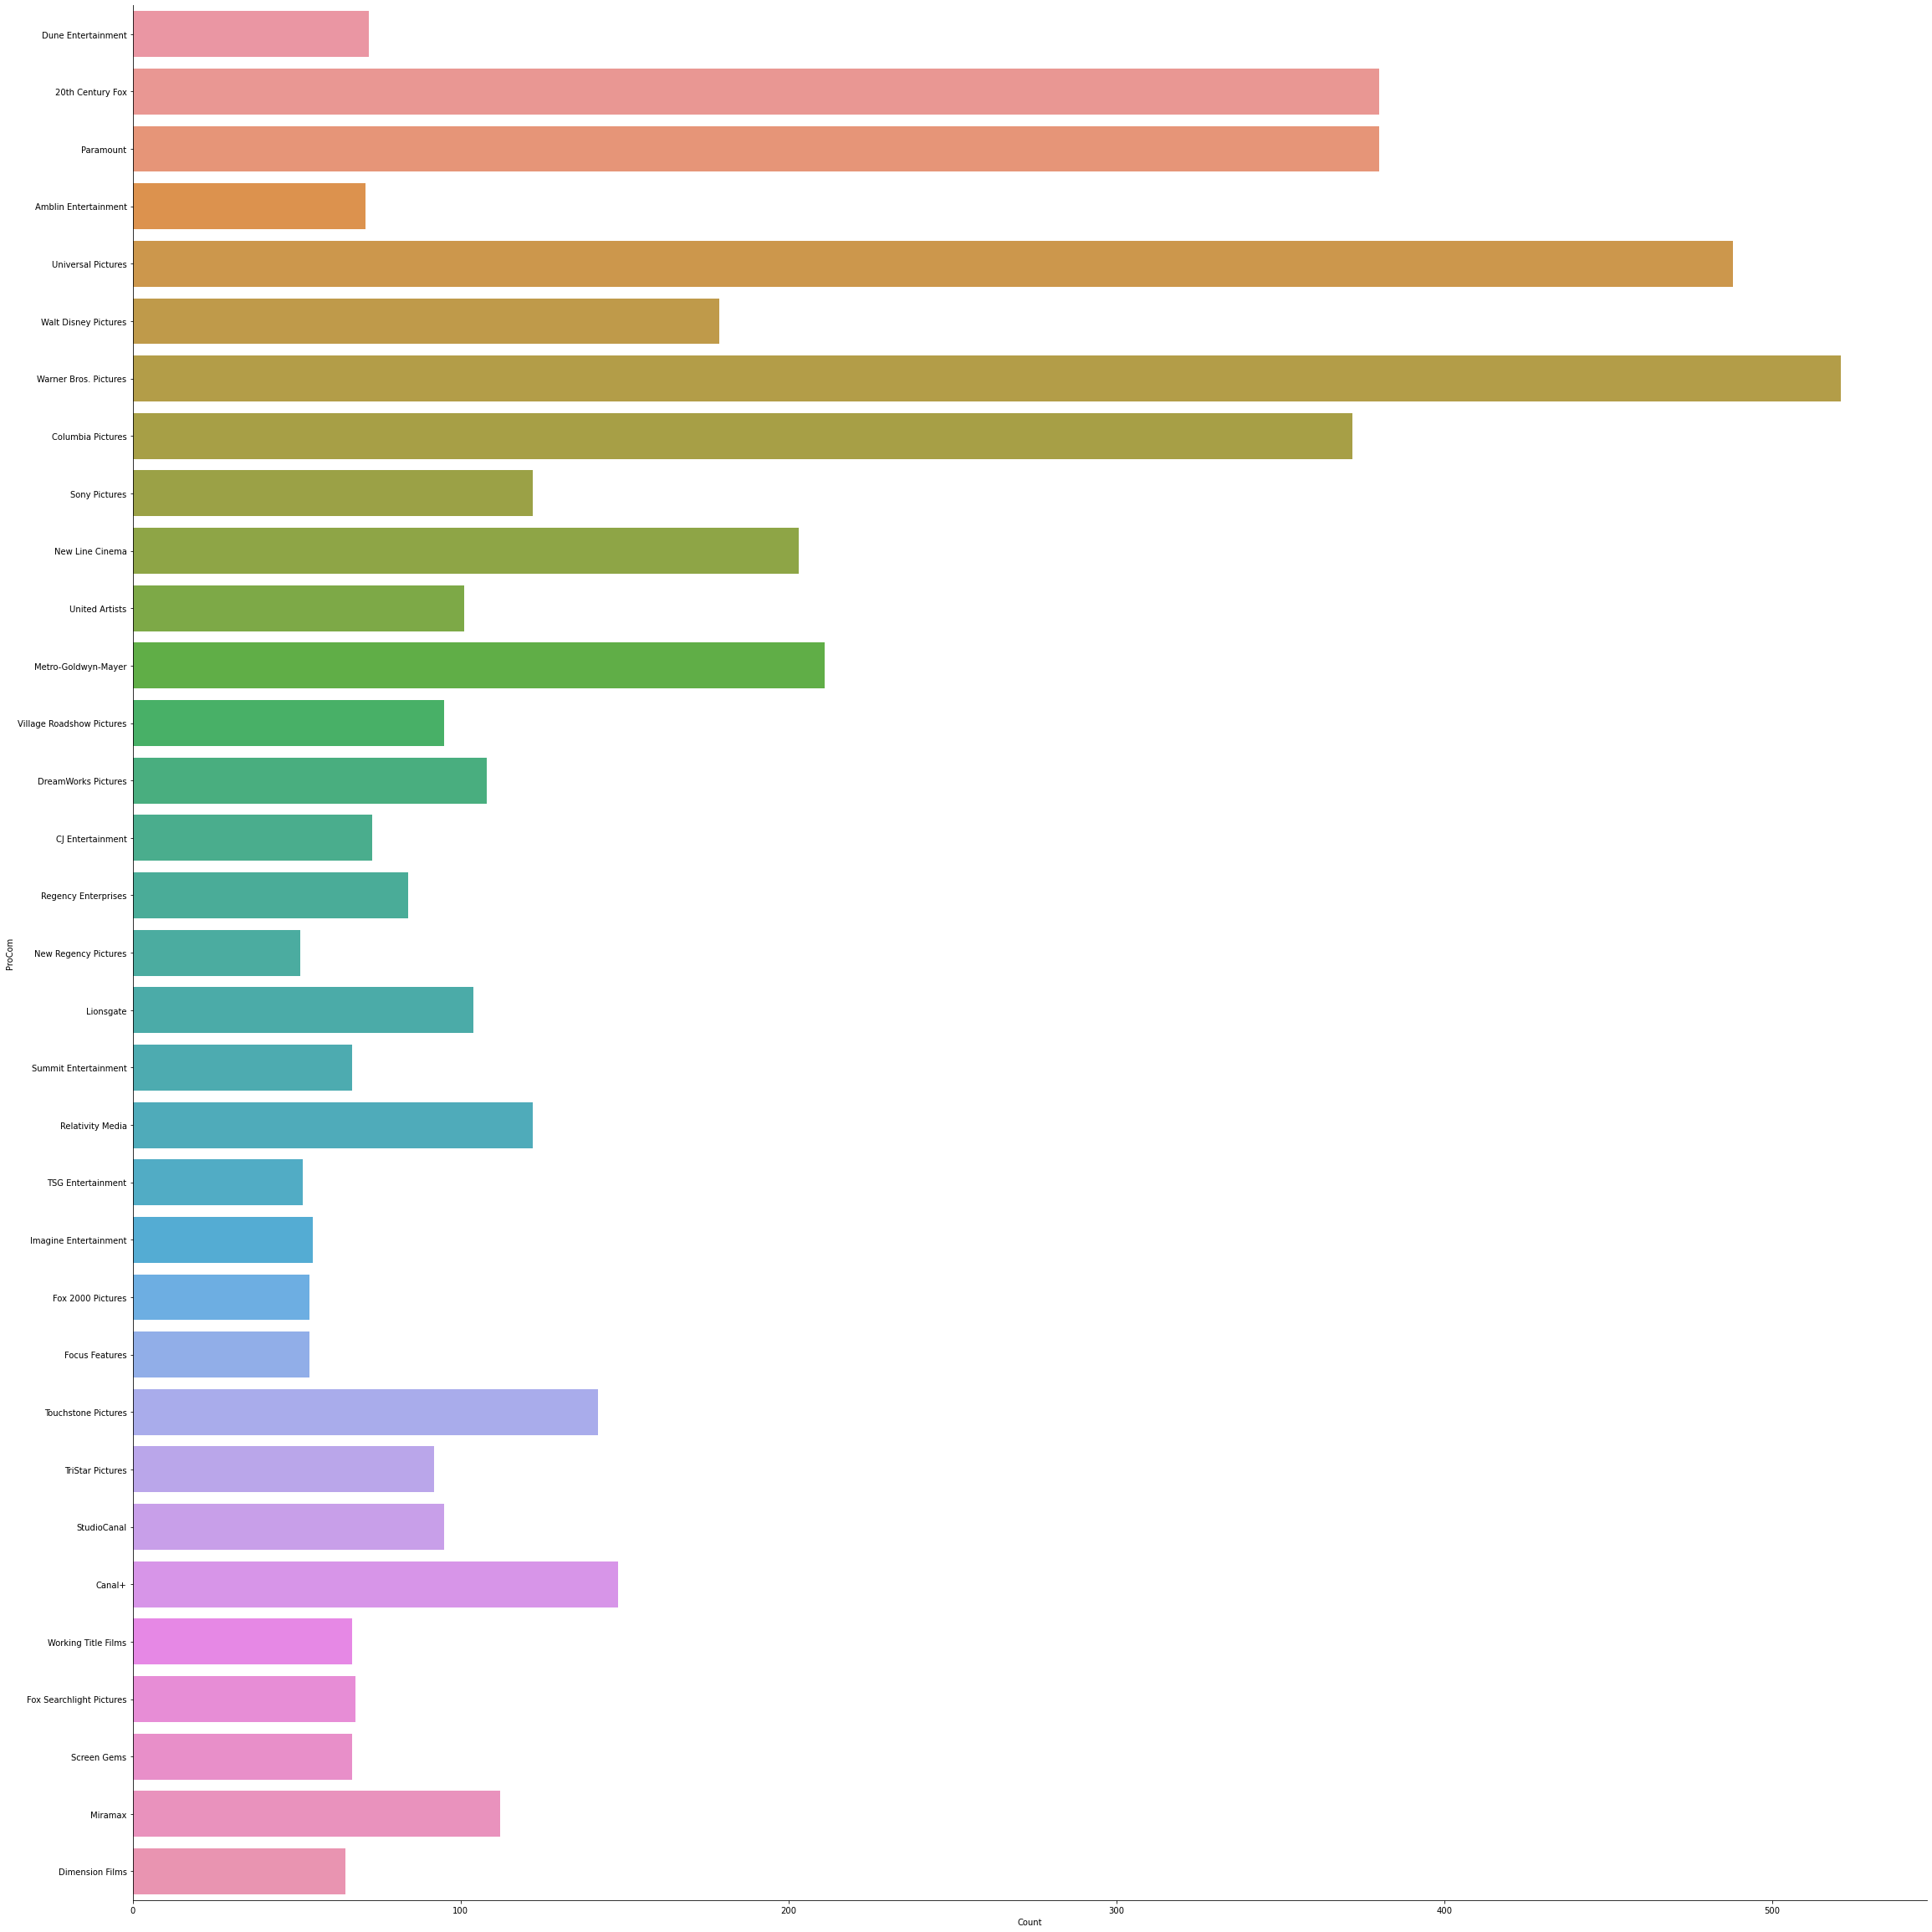

In [22]:
sb.catplot(x = 'Count', y = 'ProCom', data = ProComData,kind = 'bar', height = 32)

In [23]:
ProCounData = pd.DataFrame(ProCounDic, index = ["one"])
ProCounData = ProCounData.T
ProCounData.reset_index(level=0, inplace=True)
ProCounData = ProCounData.rename(columns={"index": "ProCoun", "one": "Count"})
ProCounData.head()

ProCoun  Count
0      US   5008
1      GB    821
2      AU    138
3      NZ     31
4      CA    312

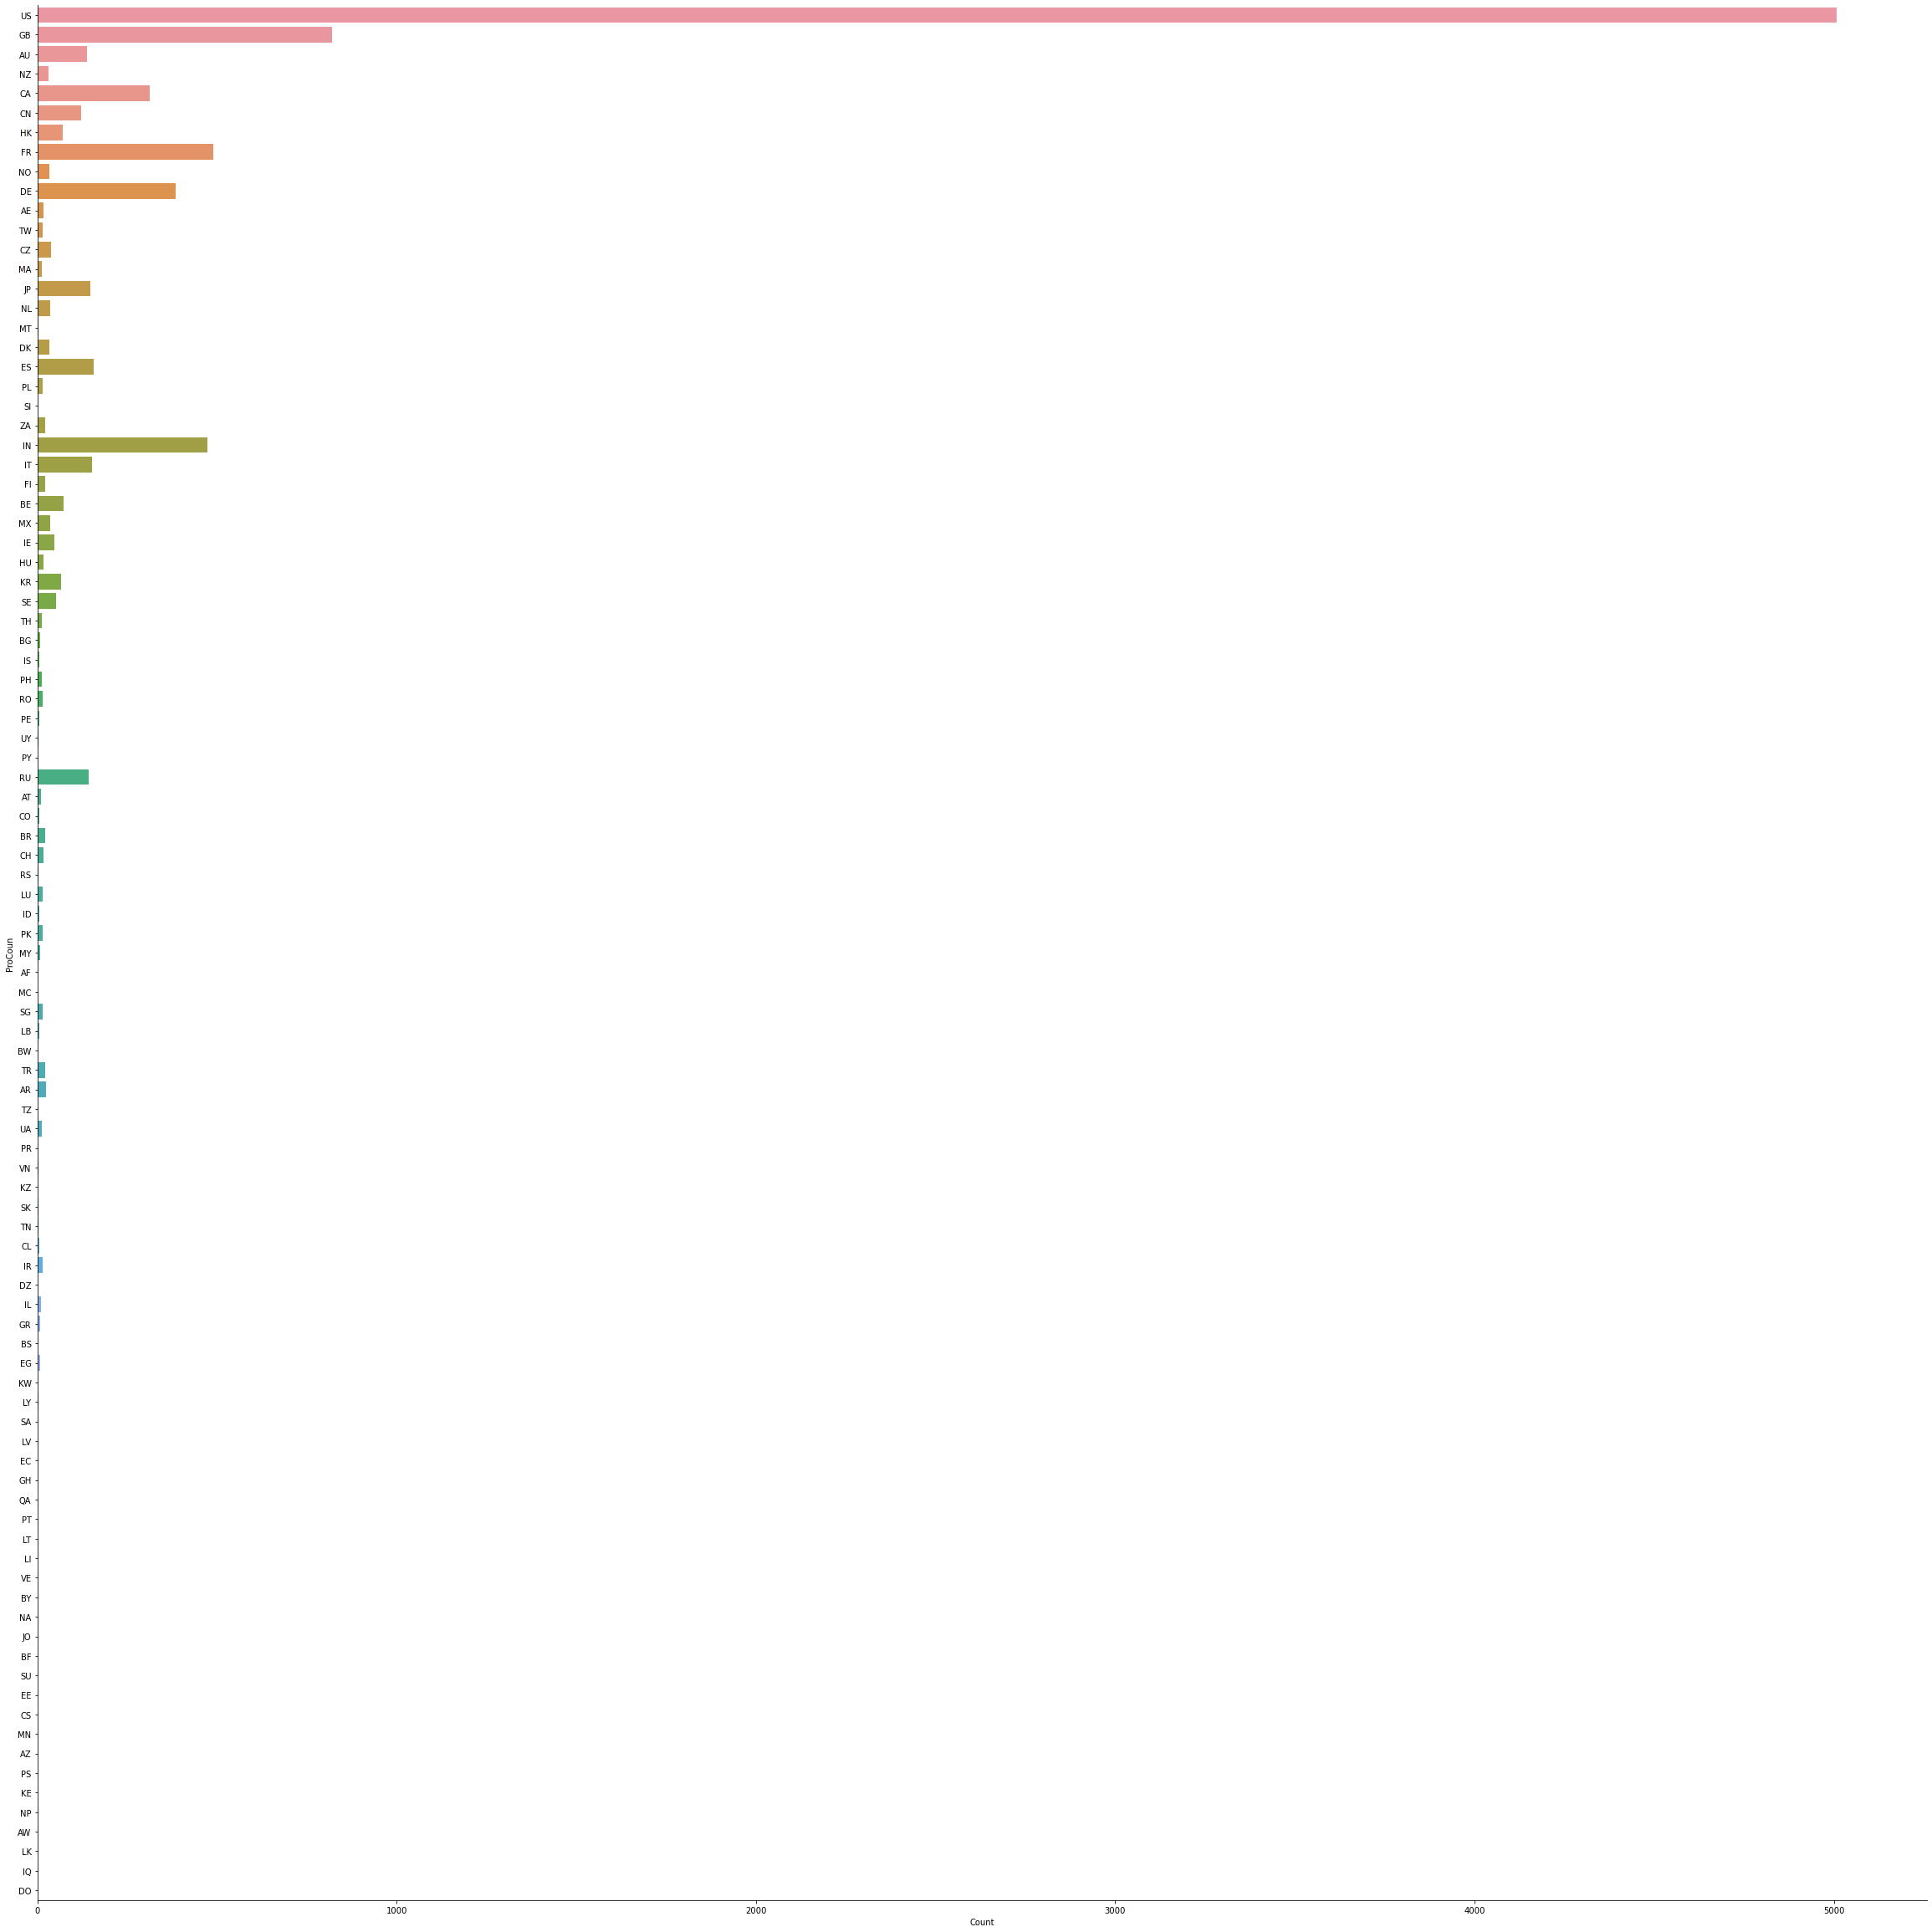

In [24]:
sb.catplot(x = 'Count', y = 'ProCoun', data = ProCounData,kind = 'bar', height = 32)

In [25]:
SpoLangData = pd.DataFrame(SpoLangDic, index = ["one"])
SpoLangData = SpoLangData.T
SpoLangData.reset_index(level=0, inplace=True)
SpoLangData = SpoLangData.rename(columns={"index": "SpoLang", "one": "Count"})
SpoLangData.head()

SpoLang  Count
0      en   5626
1      ja    198
2      xh      6
3      es    580
4      fr    594

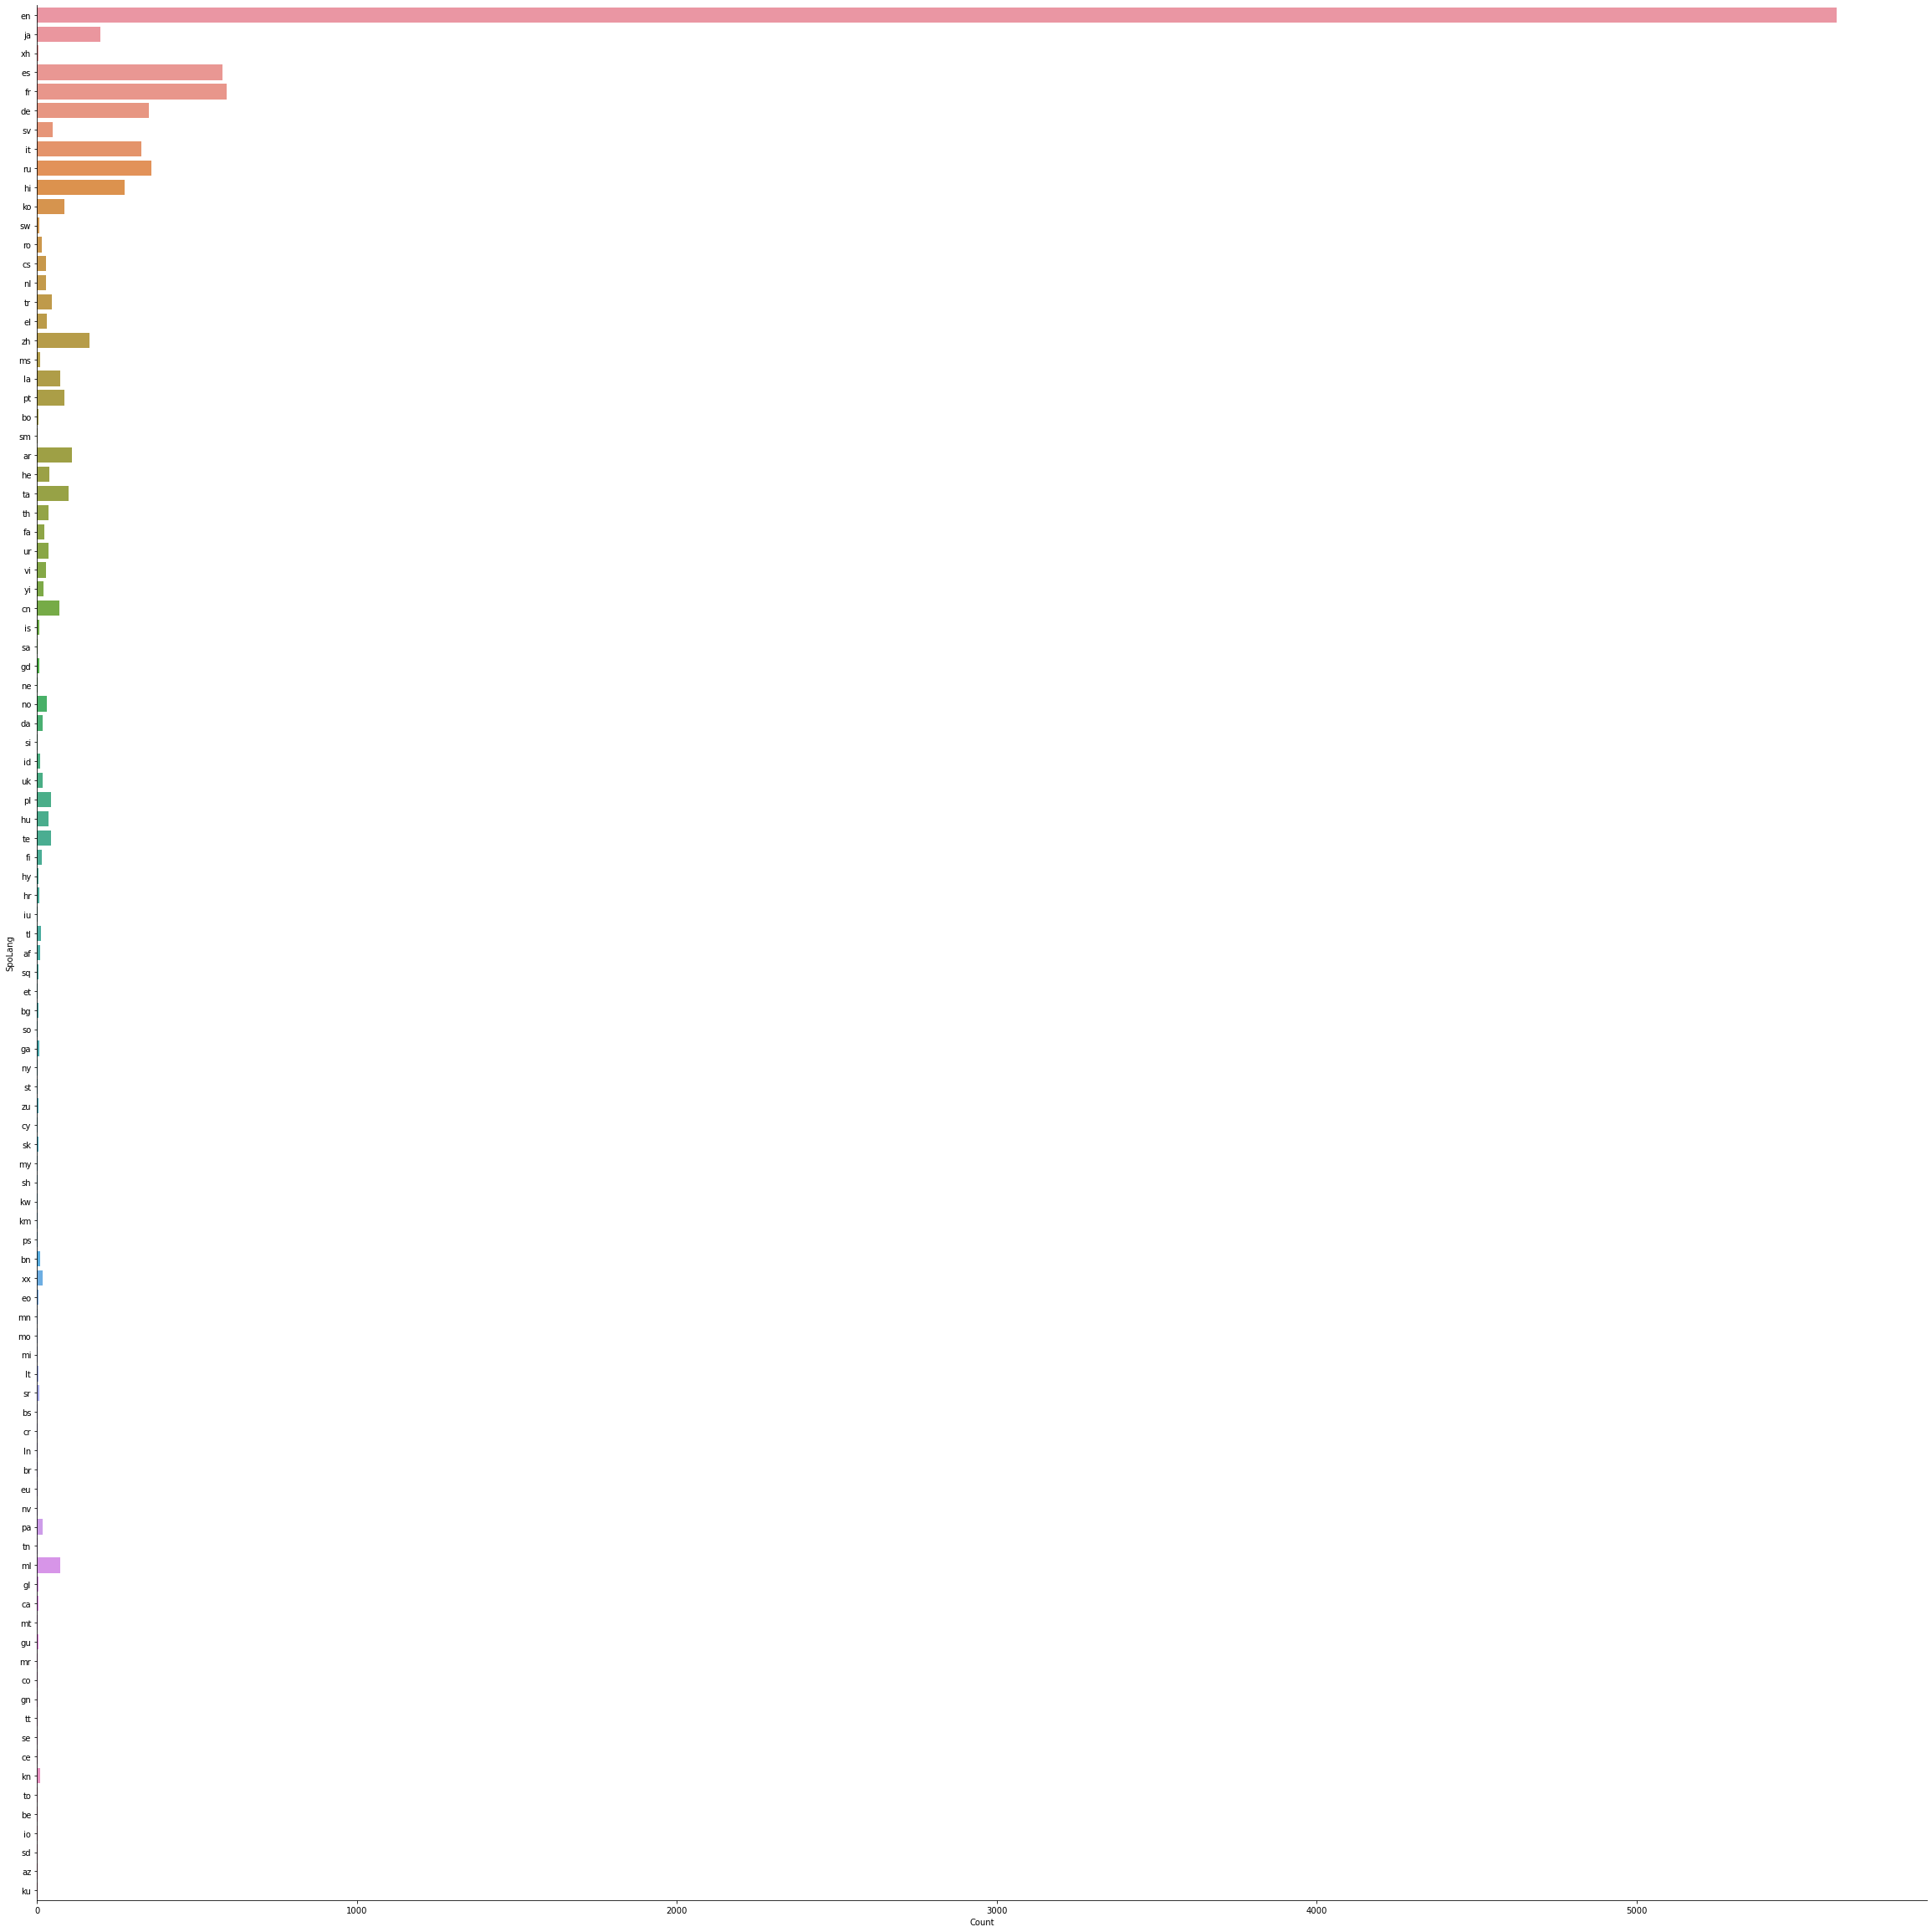

In [26]:
sb.catplot(x = 'Count', y = 'SpoLang', data = SpoLangData,kind = 'bar', height = 32)

In [27]:
# Distribution of BldgType across MSSubClass
f = plt.figure(figsize=(20, 8))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

NameError: name 'houseCatData' is not defined

<Figure size 1440x576 with 0 Axes>